## Introduction

The goal of this Lab is to get familiar with the NLTK library, understand the different processing methods on words/sequences and apply those on different articles. The final goal is to measure the similarity between two articles. To test our algorithm I've chosen two articles talking about the same subject (NBA China controversy) and one about astronomy.

## Setting up NLTK

In [1]:
!pip install nltk

In [1]:
import nltk

In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### Checking if articles respect the Zipf's law

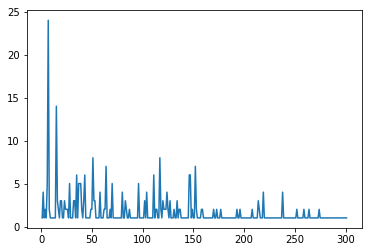

In [11]:
import pylab

frequency = {}
open_file = open('Astro.txt', 'r', encoding='utf-8')
file_to_string = open_file.read()
words = re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)', file_to_string)

fdist = nltk.FreqDist(words)
pylab.plot(
            range(1, fdist.B() + 1),      # x-axis: word rank
            fdist.values()                # y-axis: word count
            )

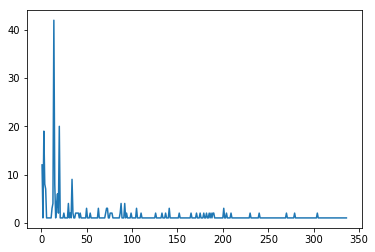

In [12]:
frequency = {}
open_file = open('NBA1.txt', 'r', encoding='utf-8')
file_to_string = open_file.read()
words = re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)', file_to_string)

fdist = nltk.FreqDist(words)
pylab.plot(
            range(1, fdist.B() + 1),      # x-axis: word rank
            fdist.values()                # y-axis: word count
            )

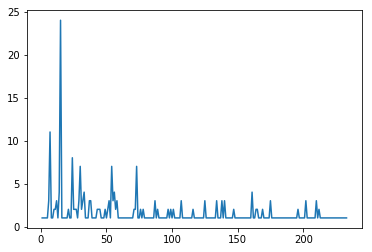

In [13]:
frequency = {}
open_file = open('NBA2.txt', 'r', encoding='utf-8')
file_to_string = open_file.read()
words = re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)', file_to_string)

fdist = nltk.FreqDist(words)
pylab.plot(
            range(1, fdist.B() + 1),      # x-axis: word rank
            fdist.values()                # y-axis: word count
            )

## Tokenization

To perform tokenization, we can import the sentence tokenization function. The argument of this
function will be text that needs to be tokenized. The sent_tokenize function uses an instance of
NLTK known as PunktSentenceTokenizer . This instance of NLTK has already been trained to
perform tokenization on different European languages on the basis of letters or punctuation that
mark the beginning and end of sentences.

Exemple of an english Tokenization :

In [14]:
tokenizer=nltk.data.load('tokenizers/punkt/english.pickle')
text=" Hello everyone. Hope all are fine and doing well. Hope you find the book interesting"
tokenizer.tokenize(text)

[' Hello everyone.',
 'Hope all are fine and doing well.',
 'Hope you find the book interesting']

Exemple of a french Tokenization :

In [17]:
french_tokenizer=nltk.data.load('tokenizers/punkt/french.pickle')
french_tokenizer.tokenize("""Deux agressions en quelques jours, voilà ce qui a motivé hier matin 
le débrayage collège franco-britanniquedeLevallois-Perret. Deux agressions en quelques jours,
voilà ce qui a motivé hier matin le débrayage Levallois. L'équipe pédagogique de ce collège de 750
élèves avait déjà été choquée par l'agression, janvier , d'un professeur d'histoire. L'équipe
pédagogique de ce collège de 750 élèves avait déjà été choquée par l'agression, mercredi , d'un
professeur d'histoire.""")

['Deux agressions en quelques jours, voilà ce qui a motivé hier matin \nle débrayage collège franco-britanniquedeLevallois-Perret.',
 'Deux agressions en quelques jours,\nvoilà ce qui a motivé hier matin le débrayage Levallois.',
 "L'équipe pédagogique de ce collège de 750\nélèves avait déjà été choquée par l'agression, janvier , d'un professeur d'histoire.",
 "L'équipe\npédagogique de ce collège de 750 élèves avait déjà été choquée par l'agression, mercredi , d'un\nprofesseur d'histoire."]

### _Tokenization of sentences into words_ :

In [18]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
tokenizer.tokenize("Have a nice day. I hope you find the book interesting")

['Have',
 'a',
 'nice',
 'day.',
 'I',
 'hope',
 'you',
 'find',
 'the',
 'book',
 'interesting']

TreebankWordTokenizer uses conventions according to Penn Treebank Corpus. It works by
separating contractions. This is shown here:

In [19]:
text=nltk.word_tokenize(" Don't hesitate to ask questions")
print(text)

['Do', "n't", 'hesitate', 'to', 'ask', 'questions']


Another word tokenizer is PunktWordTokenizer . It works by splitting punctuation; each word is
kept instead of creating an entirely new token. Another word tokenizer is WordPunctTokenizer . It
provides splitting by making punctuation an entirely new token. This type of splitting is usually
desirable:

In [20]:
from nltk.tokenize import WordPunctTokenizer
tokenizer=WordPunctTokenizer()
tokenizer.tokenize(" Don't hesitate to ask questions")

['Don', "'", 't', 'hesitate', 'to', 'ask', 'questions']

### _Tokenization using regular expressions(regex)_ :

In [22]:
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer("[\w]+")
tokenizer.tokenize("Don't hesitate to ask questions")

['Don', 't', 'hesitate', 'to', 'ask', 'questions']

Instead of instanciating a class :

In [23]:
from nltk.tokenize import regexp_tokenize
sent="Don't hesitate to ask questions"
print(regexp_tokenize(sent, pattern='\w+|\$[\d\.]+|\S+'))

['Don', "'t", 'hesitate', 'to', 'ask', 'questions']


### _Conversion into lowercase and uppercase :_

In [24]:
text='HARdWork IS KEy to SUCCESS'
print(text.lower())
print(text.upper())

hardwork is key to success
HARDWORK IS KEY TO SUCCESS


### _Dealing with stop words :_

In [25]:
from nltk.corpus import stopwords
stops=set(stopwords.words('english'))
words=["Don't", 'hesitate','to','ask','questions']
[word for word in words if word not in stops]

["Don't", 'hesitate', 'ask', 'questions']

In [26]:
stopwords.fileids()

['arabic',
 'azerbaijani',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

### _Example of the replacement of a text with another text :_

In [2]:
import re

replacement_patterns = [
    (r'’', '\''),
    (r'won\'t', 'will not'),
    (r'can\'t', 'cannot'),
    (r'i\'m', 'i am'),
    (r'ain\'t', 'is not'),
    (r'(\w+)\'ll', '\g<1> will'),
    (r'(\w+)n\'t', '\g<1> not'),
    (r'(\w+)\'ve', '\g<1> have'),
    (r'(\w+)\'s', '\g<1> is'),
    (r'(\w+)\'re', '\g<1> are'),
    (r'(\w+)\'d', '\g<1> would'),
]

class RegexpReplacer(object):
    def __init__(self, patterns=replacement_patterns): 
        self.patterns = [(re.compile(regex), repl) for (regex, repl) in patterns]
    def replace(self, text):
        s = text
        for (pattern, repl) in self.patterns:
            s = re.sub(pattern, repl, s) 
        return s
    

replacer=RegexpReplacer()
replacer.replace("Don't hesistate to ask questions")

'Do not hesistate to ask questions'

In [40]:
 replacer.replace("She must've gone to the market but she didn't go")

'She must have gone to the market but she did not go'

Performing substitution before tokenization :

In [42]:
from nltk.tokenize import word_tokenize
replacer=RegexpReplacer()
word_tokenize("Don't hesitate to ask questions")

['Do', "n't", 'hesitate', 'to', 'ask', 'questions']

In [43]:
word_tokenize(replacer.replace("Don't hesitate to ask questions"))

['Do', 'not', 'hesitate', 'to', 'ask', 'questions']

## Lemmatization

Lemmatization is the process in which we transform the word into a form with a different word
category. The word formed after lemmatization is entirely different. The built-in morphy() function
is used for lemmatization in WordNetLemmatizer. The inputted word is left unchanged if it is not
found in WordNet. In the argument, pos refers to the part of speech category of the inputted word.

In [44]:
from nltk.stem import WordNetLemmatizer
lemmatizer_output=WordNetLemmatizer()
lemmatizer_output.lemmatize('working')

'working'

In [45]:
lemmatizer_output.lemmatize('working',pos='v')

'work'

In [46]:
lemmatizer_output.lemmatize('works')

'work'

In [47]:
from nltk.stem import PorterStemmer
stemmer_output=PorterStemmer()
stemmer_output.stem('happiness')

'happi'

In [48]:
from nltk.stem import WordNetLemmatizer
lemmatizer_output=WordNetLemmatizer()
lemmatizer_output.lemmatize('happiness')

'happiness'

In the preceding code, happiness is converted to happi by stemming.
Lemmatization doesn't find the root word for happiness , so it returns the word
happiness.

## Similarity measure

In [50]:
from nltk.metrics import *
edit_distance("relate","relation")

3

In [51]:
edit_distance("suggestion","calculation")

7

### _Applying similarity measures using Jaccard's Coefficient :_

Applying similarity measures using Jaccard's Coefficient.
Jaccard's coefficient, or Tanimoto coefficient, may be defined as a measure of the overlap of two
sets, X and Y.  
It may be defined as follows:
* Jaccard(X,Y)=|X∩Y|/|XUY|  
* Jaccard(X,X)=1  
* Jaccard(X,Y)=0 if X∩Y=0

In [176]:
from nltk.metrics import *
X=set([10,20,30,40])
Y=set([20,30,60])
print(jaccard_distance(X,Y))

0.6


## Finding 2 nearest sentences between 2 articles.

We are going to try to find the two nearest sentences in similar articles (NBA & China).

In [3]:
open_file = open('NBA1.txt', 'r', encoding='utf-8')
file_to_string = open_file.read()
type(file_to_string)

str

We start by performing the replacement of contractions.

In [4]:
text_replaced = replacer.replace(file_to_string)

print(file_to_string[-156:-142])
print(text_replaced[-158:-142])
print(type(text_replaced))

We’ll find out
We will find out
<class 'str'>


Tokenizing into sentences.

In [5]:
tokenizer=nltk.data.load('tokenizers/punkt/english.pickle')
sentences = tokenizer.tokenize(text_replaced)
sentences[0:2]

['The NBA is history in China is more than three decades old.',
 'China Central Television struck a deal with the league in 1987 to offer games for free, and their relationship prospered in the 1990s, as the Chicago Bulls were busy winning championships and Michael Jordan was becoming a global icon.']

Tokenizing into words.

In [6]:
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer("[\w]+")

for i in range(len(sentences)):
    sentences[i] = tokenizer.tokenize(sentences[i])
sentences[0]

['The',
 'NBA',
 'is',
 'history',
 'in',
 'China',
 'is',
 'more',
 'than',
 'three',
 'decades',
 'old']

We now delete stop words.

In [7]:
from nltk.corpus import stopwords
stops=set(stopwords.words('english'))


for i in range(len(sentences)):
    sentences[i] = [word for word in sentences[i] if word not in stops]
sentences[0]

['The', 'NBA', 'history', 'China', 'three', 'decades', 'old']

Lemmatization for each sentence.

In [8]:
from nltk.stem import WordNetLemmatizer
lemmatizer_output=WordNetLemmatizer()


for i in range(len(sentences)):
    for j in range(len(sentences[i])):
        sentences[i][j] = lemmatizer_output.lemmatize(sentences[i][j])
sentences[1]

['China',
 'Central',
 'Television',
 'struck',
 'deal',
 'league',
 '1987',
 'offer',
 'game',
 'free',
 'relationship',
 'prospered',
 '1990s',
 'Chicago',
 'Bulls',
 'busy',
 'winning',
 'championship',
 'Michael',
 'Jordan',
 'becoming',
 'global',
 'icon']

Join the words back into a sentence.

In [9]:
for i in range(len(sentences)):
    sentences[i] = ' '.join(sentences[i])
sentences[0]

'The NBA history China three decade old'

We do the same for the 2nd article.

In [10]:
open_file2 = open('NBA2.txt', 'r', encoding='utf-8')
file_to_string2 = open_file2.read()

text_replaced2 = replacer.replace(file_to_string2)

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
sentences2 = tokenizer.tokenize(text_replaced2)

from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer("[\w]+")

for i in range(len(sentences2)):
    sentences2[i] = tokenizer.tokenize(sentences2[i])

from nltk.corpus import stopwords
stops=set(stopwords.words('english'))

for i in range(len(sentences2)):
    sentences2[i] = [word for word in sentences2[i] if word not in stops]

from nltk.stem import WordNetLemmatizer
lemmatizer_output=WordNetLemmatizer()

for i in range(len(sentences2)):
    for j in range(len(sentences2[i])):
        sentences2[i][j] = lemmatizer_output.lemmatize(sentences2[i][j])

for i in range(len(sentences2)):
    sentences2[i] = ' '.join(sentences2[i])
sentences2[0]

'SHANGHAI A day scheduled tipoff Brooklyn Nets Los Angeles Lakers game Shanghai crisis National Basketball Association appeared closer resolution'

We are now going to compare all sentences by measuring the similarity between two sentences using Jaccard's coefficient.

In [13]:
def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

We compare all the sentences between both articles and keep the indexes of the sentences that got the best similarity (best Jaccard's coefficient).

In [24]:
from nltk.metrics import *

comparison = []
maximum, imax, jmax = 0.0, 0, 0
for i in range(len(sentences)):
    for j in range(len(sentences2)):
        dist = get_jaccard_sim(sentences[i],sentences2[j])
        if(dist > maximum):
            maximum = dist
            imax = i
            jmax = j

In [25]:
print(maximum)
print(sentences[imax])
print(sentences2[jmax])

0.19047619047619047
There would social stability cost banning NBA China The Friday night tweet Houston Rockets general manager Daryl Morey banned platform China suddenly thrust NBA turbulent water Sino American politics
Chinese broadcaster sponsor suspended aspect cooperation NBA commissioner said would apologize tweet Rockets general manager Daryl Morey though league also said regrettable upset Chinese fan


In [18]:
sentences

['The NBA history China three decade old',
 'China Central Television struck deal league 1987 offer game free relationship prospered 1990s Chicago Bulls busy winning championship Michael Jordan becoming global icon',
 'The NBA become popular China since',
 'The league official Chinese language account Weibo Inc short messaging service follower account Twitter',
 'Floor seat Lakers v Nets game Thursday sold 2 500 vanished Alibaba backed ticketing site remnant NBA continued disappear',
 'China 300 million basketball player nearly many people U S roughly 500 million viewer watched NBA last season Tencent Sports streaming platform recently extended deal league 1 5 billion five year',
 'That deal massive indicator perceived value enormous potential China market Shanghai based sport research firm Mailman Group wrote recent report',
 'The league carefully plotted strategy course 30 year given NBA negotiating gambit eluded Hollywood studio Marriott Gap Delta Airlines fixture corporate America 

In [19]:
sentences2

['SHANGHAI A day scheduled tipoff Brooklyn Nets Los Angeles Lakers game Shanghai crisis National Basketball Association appeared closer resolution',
 'A player meet greet canceled press event postponed spokeswoman league said late Wednesday',
 'The team practice player participated Special Olympics related NBA Cares event though one planned Tuesday go ahead',
 'A tweet last week executive Houston Rockets popular China country week set political storm praised antigovernment protester In Hong Kong',
 'Chinese broadcaster sponsor suspended aspect cooperation NBA commissioner said would apologize tweet Rockets general manager Daryl Morey though league also said regrettable upset Chinese fan',
 'The NBA spokeswoman said information Thursday planned game Shanghai',
 'Half hour press event player Nets Lakers delayed late Wednesday indication whether would take place',
 'The Nets owned co founder Chinese online merchant Alibaba Group Holding Ltd Joe Tsai',
 'Exhibition game NBA minor league ca